In [58]:
import pandas as pd
import numpy as np

In [59]:
data = pd.read_csv("../06machine_learning/data/Titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [62]:
data['family'] = data['SibSp'] + data['Parch']

In [63]:
data = data.drop(['SibSp', 'Parch'], axis=1)
data

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0
...,...,...,...,...,...,...
886,0,2,male,27.0,S,0
887,1,1,female,19.0,S,0
888,0,3,female,NaN,S,3
889,1,1,male,26.0,C,0


In [64]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [65]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    object 
 5   family    891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [67]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 딥러닝시에도 데이터의 스케일을 맞춰 주는것이 좋다.
* StandardScaler, MinMaxScaler를 주로 사용, 이상값이 많을 경우 RobustScaler를 사용
* 이진분류(0,1): MinMaxScaler
* 연속값예측: StandardScaler

In [70]:
X_train

,Pclass,Sex,Age,Embarked,family
748,1,male,19.000000,S,1
45,3,male,29.699118,S,0
28,3,female,29.699118,Q,0
633,1,male,29.699118,S,0
403,3,male,28.000000,S,1
...,...,...,...,...,...
476,2,male,34.000000,S,1
190,2,female,32.000000,S,0
736,3,female,48.000000,S,4
462,1,male,47.000000,S,0


In [71]:
cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(exclude='object').columns
print(cat_cols)
print(num_cols)

Index(['Sex', 'Embarked'], dtype='object')
Index(['Pclass', 'Age', 'family'], dtype='object')


In [72]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [73]:
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
ohe.fit(X_train[cat_cols])
ohe_X_train = ohe.transform(X_train[cat_cols])
ohe_X_test = ohe.transform(X_test[cat_cols])
ohe_X_train_df = pd.DataFrame(ohe_X_train, columns=ohe.get_feature_names_out(), index= X_train.index)
ohe_X_test_df = pd.DataFrame(ohe_X_test, columns=ohe.get_feature_names_out(), index= X_test.index)

In [74]:
ohe_X_train_df

,Sex_male,Embarked_Q,Embarked_S
748,1.0,0.0,1.0
45,1.0,0.0,1.0
28,0.0,1.0,0.0
633,1.0,0.0,1.0
403,1.0,0.0,1.0
...,...,...,...
476,1.0,0.0,1.0
190,0.0,0.0,1.0
736,0.0,0.0,1.0
462,1.0,0.0,1.0


In [75]:
mms = MinMaxScaler()
mms.fit(X_train[num_cols])
mms_X_train = mms.transform(X_train[num_cols])
mms_X_test = mms.transform(X_test[num_cols])
mms_X_train_df = pd.DataFrame(mms_X_train, columns=X_train[num_cols].columns, index= X_train.index)
mms_X_test_df = pd.DataFrame(mms_X_test, columns=X_test[num_cols].columns, index= X_test.index)
mms_X_train_df

,Pclass,Age,family
748,0.0,0.233476,0.1
45,1.0,0.367921,0.0
28,1.0,0.367921,0.0
633,0.0,0.367921,0.0
403,1.0,0.346569,0.1
...,...,...,...
476,0.5,0.421965,0.1
190,0.5,0.396833,0.0
736,1.0,0.597889,0.4
462,0.0,0.585323,0.0


In [76]:
X_train_df = pd.concat([mms_X_train_df, ohe_X_train_df], axis=1)
X_test_df = pd.concat([mms_X_test_df, ohe_X_test_df], axis=1)

In [77]:
X_train_df

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
748,0.0,0.233476,0.1,1.0,0.0,1.0
45,1.0,0.367921,0.0,1.0,0.0,1.0
28,1.0,0.367921,0.0,0.0,1.0,0.0
633,0.0,0.367921,0.0,1.0,0.0,1.0
403,1.0,0.346569,0.1,1.0,0.0,1.0
...,...,...,...,...,...,...
476,0.5,0.421965,0.1,1.0,0.0,1.0
190,0.5,0.396833,0.0,0.0,0.0,1.0
736,1.0,0.597889,0.4,0.0,0.0,1.0
462,0.0,0.585323,0.0,1.0,0.0,1.0


In [78]:
X_test_df

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
625,0.0,0.761247,0.0,1.0,0.0,1.0
566,1.0,0.233476,0.0,1.0,0.0,1.0
459,1.0,0.367921,0.0,1.0,1.0,0.0
804,1.0,0.334004,0.0,1.0,0.0,1.0
338,1.0,0.560191,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
184,1.0,0.044986,0.2,0.0,0.0,1.0
607,0.0,0.334004,0.0,1.0,0.0,1.0
624,1.0,0.258608,0.0,1.0,0.0,1.0
103,1.0,0.409399,0.0,1.0,0.0,1.0


# Tensorflow Sequential API를 사용한 순차적 모델 생성 및 분석
* Sequential: 인공신경망을 순차적으로 작성할 때 사용
* Dense: 층, 레이어
* 1. 신경망 모델 정의
* 2. 신경망 모델 훈련
* 3. 훈련된 모델로 테스트
* 4. 검증

* 입력층은 반드시 독립변수의수(input_dim)를 정확히 지정
* 신경망 모델의 은닉층은 2~3개 정도로 한다.
* Dense의 노드수는 2의 배수의 지정 2 4 8 16 256
* Dense의 노드는 큰 수에서 작은 수로 줄여나간다.
* 은닉층의 활성화 함수: Relu
* 출력층은 이진분류일 경우 sigmoid, 다중분류일 경우 softmax
* 회귀분석일 경우(종속변수가 연속형(수치형)인 경우) 출력층에 활성화 함수 없이 노드를 1로 지정

In [79]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [80]:
X_train_df.shape[1]

6

In [81]:
# 신경망 모델 정의 keras 3.0, tensroflow 2.19 기준
model = Sequential()
model.add(Input(shape=(X_train_df.shape[1],))) # 입력층
model.add(Dense(64, activation='relu'))  # 은닉층
model.add(Dense(32, activation='relu'))  # 은닉층
model.add(Dense(16, activation='relu'))  # 은닉층
model.add(Dense(1, activation='sigmoid'))  # 출력층, 이진분류이므로 sigmoid

In [29]:
# dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
# dtc.fit(X_train, y_train)

#  모델의 파라미터 세팅 model.compile()
* loss: 오차 계산 지표
  * 이진분류: binary_crossentropy
  * 다중분류: categorical_crossentropy - y가 one-hot encoding
  * 데이터에 0이 많은 희소행렬인 경우: sparse_categorical_crossentropy - y label encoding
  * 연속형데이터(회귀분석): mse
* optimizer: learning_rate
  * adam을 가장 많이 사용
* metrics: 평가지표 accuracy

In [82]:
# 모델의 파라미터 세팅
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

# 모델 훈련 model.fit(X_train, y_train)
* epochs: 전체 데이터를 한 번 훈련하는 주기, 10-100 사이
* batch_size: 전체 데이터를 쪼개서 훈련, 데이터의 묶음, 메모리에 맞춰서 크기 조절(2의 배수) 32, 64로 쪼개서 넣는 것 추천
* validation_data: 검증 데이터로 모델 검증 실시

In [31]:
len(X_train_df)

623

In [83]:
history = model.fit(X_train_df, y_train, epochs=100, 
                    batch_size=16, validation_data=(X_test_df, y_test))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s -6064us/step - accuracy: 0.6356 - loss: 0.6150 - val_accuracy: 0.6567 - val_loss: 0.5889
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7063 - loss: 0.5599 - val_accuracy: 0.7910 - val_loss: 0.5362
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7881 - loss: 0.5055 - val_accuracy: 0.7724 - val_loss: 0.4899
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7833 - loss: 0.4745 - val_accuracy: 0.7761 - val_loss: 0.4767
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8026 - loss: 0.4681 - val_accuracy: 0.7761 - val_loss: 0.4752
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8026 - loss: 0.4551 - val_accuracy: 0.8172 - val_loss: 0.4516
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8074 - loss: 0.4455 - val_accuracy: 0.8134 - val_loss: 0.4464
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8170 - loss: 0.4389 - val_accuracy: 0.7351

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8347 - loss: 0.3988 - val_accuracy: 0.8097 - val_loss: 0.4242
Epoch 52/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8379 - loss: 0.3966 - val_accuracy: 0.8134 - val_loss: 0.4208
Epoch 53/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8347 - loss: 0.3974 - val_accuracy: 0.8134 - val_loss: 0.4204
Epoch 54/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8411 - loss: 0.3949 - val_accuracy: 0.8097 - val_loss: 0.4219
Epoch 55/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8411 - loss: 0.3929 - val_accuracy: 0.7873 - val_loss: 0.4375
Epoch 56/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8315 - loss: 0.3979 - val_accuracy: 0.7948 - val_loss: 0.4498
Epoch 57/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8443 - loss: 0.3960 - val_accuracy: 0.8097 - val_loss: 0.4239
Epoch 58/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8395 - loss: 0.3909 - val_accuracy: 0.7985 - val_lo

# 딥러닝 모델 성능 평가
* 딥러닝에서 모델의 성능을 평가하는 지표는 loss
* 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않을 때도 있음.
* accuracy와 loss 간의 차이가 있을 때 loss가 낮은 모델이 우수한 모델

In [84]:
score = model.evaluate(X_test_df, y_test)
print('test_loss: ', score[0])
print('test accuracy: ', score[1])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7799 - loss: 0.4658
test_loss:  0.4657997786998749
test accuracy:  0.7798507213592529


In [34]:
for i in history.history:
    print(f"{i}: ", history.history[i])

accuracy:  [0.6099518537521362, 0.6998394727706909, 0.7833065986633301, 0.778491199016571, 0.7897271513938904, 0.8009631037712097, 0.8057785034179688, 0.8105939030647278, 0.8089887499809265, 0.80738365650177, 0.8170144557952881, 0.8202247023582458, 0.8138041496276855, 0.80738365650177, 0.8089887499809265, 0.8089887499809265, 0.8202247023582458, 0.8170144557952881, 0.8089887499809265, 0.8218298554420471, 0.8186196088790894, 0.8154093027114868, 0.8202247023582458, 0.8218298554420471, 0.8266452550888062, 0.8266452550888062, 0.8266452550888062, 0.8154093027114868, 0.8186196088790894, 0.8170144557952881, 0.8218298554420471, 0.8186196088790894, 0.8346709609031677, 0.8250401020050049, 0.8250401020050049, 0.8266452550888062, 0.8250401020050049, 0.8218298554420471, 0.8266452550888062, 0.8282504081726074, 0.8298555612564087, 0.8314606547355652, 0.8234350085258484, 0.8282504081726074, 0.8202247023582458, 0.8346709609031677, 0.8218298554420471, 0.8314606547355652, 0.8394863605499268, 0.83627605438

In [85]:
import matplotlib.pyplot as plt

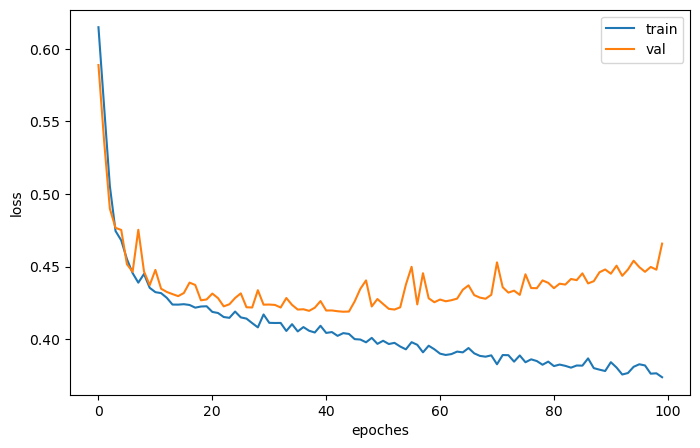

In [86]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델의 예측값 출력

In [87]:
pred = model.predict(X_test_df)
pred

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


array([[0.34557587],
       [0.14735638],
       [0.14197949],
       [0.12441573],
       [0.09714436],
       [0.46693024],
       [0.12209503],
       [0.94381255],
       [0.11959038],
       [0.9909334 ],
       [0.8174481 ],
       [0.9996393 ],
       [0.42018783],
       [0.34769097],
       [0.8940738 ],
       [0.85161567],
       [0.14197949],
       [0.41417208],
       [0.9747395 ],
       [0.41337523],
       [0.06912038],
       [0.08522677],
       [0.58290935],
       [0.12441573],
       [0.31605235],
       [0.13360126],
       [0.9939608 ],
       [0.33816406],
       [0.298226  ],
       [0.22808248],
       [0.9426058 ],
       [0.9694158 ],
       [0.14197949],
       [0.8443731 ],
       [0.9986087 ],
       [0.54655164],
       [0.14197949],
       [0.0836321 ],
       [0.14197949],
       [0.37082627],
       [0.12209503],
       [0.9826477 ],
       [0.6460923 ],
       [0.99570197],
       [0.9856075 ],
       [0.13176464],
       [0.5610621 ],
       [0.353

In [88]:
result = pd.DataFrame(dict(y_test=y_test, pred=pred[:,0]))
result

,y_test,pred
625,0,0.345576
566,0,0.147356
459,0,0.141979
804,1,0.124416
338,1,0.097144
...,...,...
184,1,0.879038
607,1,0.420192
624,0,0.136682
103,0,0.115200


In [89]:
result['pred'] = result['pred'].apply(lambda x: 1 if x > 0.5 else 0)
result

,y_test,pred
625,0,0
566,0,0
459,0,0
804,1,0
338,1,0
...,...,...
184,1,1
607,1,0
624,0,0
103,0,0


In [90]:
from sklearn.metrics import classification_report
print(classification_report(result['y_test'], result['pred']))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       165
           1       0.73      0.68      0.70       103

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



In [91]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train_df, y_train)
pred2 = dtc.predict(X_test_df)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.78      0.69      0.73       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



# Functional API를 이용한 함수형 모델
* Sequential API는 단순히 층을 여러 개 쌓는 형태라 복잡한 모델 생성에 한계가 있음.
* Functional  API는 입력층과 출력층을 사용자가 직접 정의 가능
* 다중입력(Multi-input), 다중출력(Multi-output)등 복잡한 모델을 정의 할 수 있음.
* Input(shape=(독립변수 수))로 입력층 정의
* 이전 층을 다음 층의 입력으로 사용
* model()에 입력과 출력을 정의

In [94]:
from keras.layers import Input, Dense
from keras.models import Model

In [ ]:
# 신경망 모델 정의 keras 3.0, tensroflow 2.19 기준
# model = Sequential()
# model.add(Input(shape=(X_train_df.shape[1],))) # 입력층
# model.add(Dense(64, activation='relu'))  # 은닉층
# model.add(Dense(32, activation='relu'))  # 은닉층
# model.add(Dense(16, activation='relu'))  # 은닉층
# model.add(Dense(1, activation='sigmoid'))  # 출력층, 이진분류이므로 sigmoid

In [96]:
# 입력층
inputs = Input(shape=(X_train_df.shape[1], ))

# 은닉층
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)

# 출력층
outputs = Dense(1, activation='sigmoid')(x)

# 모델 정의
model2 = Model(inputs=inputs, outputs=outputs)
model2.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.6581 - loss: 0.6379 - val_accuracy: 0.6604 - val_loss: 0.5930
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6709 - loss: 0.5748 - val_accuracy: 0.7761 - val_loss: 0.5512
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7737 - loss: 0.5381 - val_accuracy: 0.7799 - val_loss: 0.5213
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7657 - loss: 0.5091 - val_accuracy: 0.7687 - val_loss: 0.5021
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7769 - loss: 0.4900 - val_accuracy: 0.7761 - val_loss: 0.4853
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7913 - loss: 0.4708 - val_accuracy: 0.7799 - val_loss: 0.4695
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7978 - loss: 0.4615 - val_accuracy: 0.8172 - val_loss: 0.4597
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7978 - loss: 0.4517 - val_accuracy: 0.791

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8283 - loss: 0.4063 - val_accuracy: 0.8134 - val_loss: 0.4237
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8363 - loss: 0.4058 - val_accuracy: 0.7948 - val_loss: 0.4309
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8363 - loss: 0.4052 - val_accuracy: 0.8172 - val_loss: 0.4227
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8347 - loss: 0.4059 - val_accuracy: 0.7985 - val_loss: 0.4260
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8331 - loss: 0.4028 - val_accuracy: 0.8172 - val_loss: 0.4228
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8347 - loss: 0.4036 - val_accuracy: 0.8097 - val_loss: 0.4245
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8347 - loss: 0.4033 - val_accuracy: 0.8134 - val_loss: 0.4235
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8283 - loss: 0.4046 - val_accuracy: 0.7910 - val_

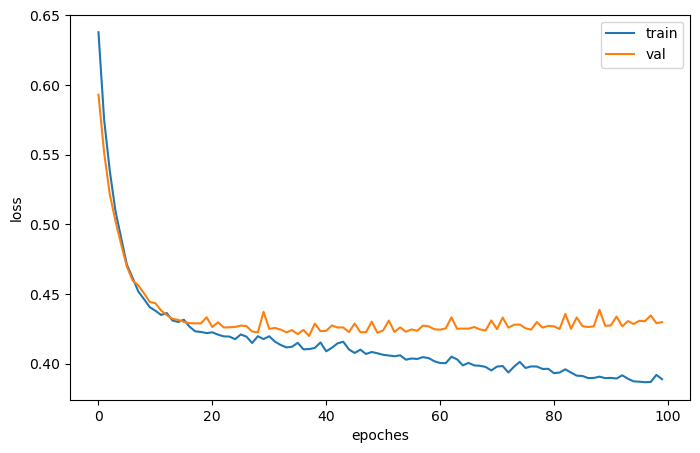

In [100]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(X_train_df, y_train, epochs=100, batch_size=32, validation_data=(X_test_df, y_test))
pred2 = model2.predict(X_test_df)
pred2= pd.DataFrame(pred2)
pred2= pred2[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, pred2))
plt.figure(figsize=(8,5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()                     

# Class 형으로 만들기 (Model Subclass API)
* class 형태의 모델 정의 방법
* keras의 Model을 상속 받아서 작성

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

In [101]:
class Titanic(Model):
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(64, activation='relu')
        self.dense3 = Dense(32, activation='relu')
        self.dense4 = Dense(16, activation='relu')
        self.classifier = Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        return self.classifier(x)

Epoch 1/100


2025-12-03 10:26:29.492663: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-03 10:26:29.492788: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-03 10:26:30.730581: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_468', 8 bytes spill stores, 8 bytes spill loads

2025-12-03 10:26:30.757646: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Re

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.7207 - loss: 0.6733 - val_accuracy: 0.7724 - val_loss: 0.6447
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7705 - loss: 0.6007 - val_accuracy: 0.7500 - val_loss: 0.5494
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7833 - loss: 0.5048 - val_accuracy: 0.7649 - val_loss: 0.4878
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7865 - loss: 0.4682 - val_accuracy: 0.7761 - val_loss: 0.4685
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7849 - loss: 0.4551 - val_accuracy: 0.7761 - val_loss: 0.4555
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8122 - loss: 0.4514 - val_accuracy: 0.7948 - val_loss: 0.4474
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8010 - loss: 0.4424 - val_accuracy: 0.8134 - val_loss: 0.4445
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8106 - loss: 0.4383 - val_accuracy: 0.8209 - val_loss

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8411 - loss: 0.3896 - val_accuracy: 0.8209 - val_loss: 0.4324
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8379 - loss: 0.3937 - val_accuracy: 0.8172 - val_loss: 0.4325
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8379 - loss: 0.3863 - val_accuracy: 0.7724 - val_loss: 0.4408
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8379 - loss: 0.3917 - val_accuracy: 0.7761 - val_loss: 0.4384
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8395 - loss: 0.3892 - val_accuracy: 0.8022 - val_loss: 0.4338
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8427 - loss: 0.3862 - val_accuracy: 0.8172 - val_loss: 0.4321
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8491 - loss: 0.3847 - val_accuracy: 0.8172 - val_loss: 0.4333
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8379 - loss: 0.3963 - val_accuracy: 0.7724 - val_lo

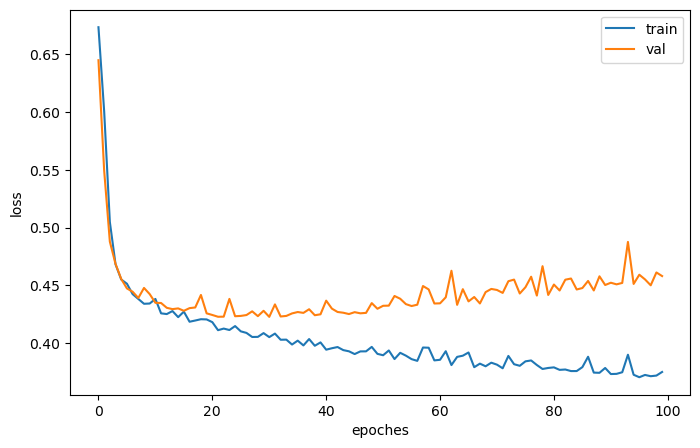

In [102]:
model3 = Titanic()
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(X_train_df, y_train, epochs=100, batch_size=32, validation_data=(X_test_df, y_test))
pred3 = model3.predict(X_test_df)
pred3= pd.DataFrame(pred3)
pred3= pred3[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, pred3))
plt.figure(figsize=(8,5))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()    